<a href="https://colab.research.google.com/github/brotheroak/Tensorflow/blob/master/MNIST_SimpleMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt  # for plotting

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10  # classes 0 - 9

# The file path to save the data
save_file = './model'

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])

# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

# simple single layer perceptron (784+1(bias) to 10)
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Class used to save and/or restore Tensor Variables
saver = tf.train.Saver()

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross Entropy Cost
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# Use SGD as Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model (for verifying accuracy)
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Parameters
training_epochs = 15
batch_size = 100
learning_rate = 0.01
display_epoch = 1
logs_path = '/tmp/tensorflow_logs/example/'

# Create a summary to monitor cost tensor
tf.summary.scalar("loss", cost)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("accuracy", accuracy)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

Epoch: 0001 cost = 2.863647661
Epoch: 0002 cost = 1.111428080
Epoch: 0003 cost = 0.875594985
Epoch: 0004 cost = 0.763047446
Epoch: 0005 cost = 0.694559901
Epoch: 0006 cost = 0.645395991
Epoch: 0007 cost = 0.609367666
Epoch: 0008 cost = 0.580364806
Epoch: 0009 cost = 0.557095881
Epoch: 0010 cost = 0.537071145
Epoch: 0011 cost = 0.520315994
Epoch: 0012 cost = 0.505811776
Epoch: 0013 cost = 0.492254809
Epoch: 0014 cost = 0.480722998
Epoch: 0015 cost = 0.470508961
Learning finished
Accuracy:  0.8886
Label:  [8]
Prediction:  [9]


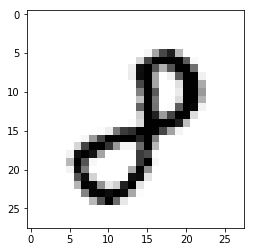

In [2]:
# Training & Test Session

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    # op to write logs to Tensorboard
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0  # for accumulation
        # If sample_size=60000 and batch_size=100, then total batch count is 600
        total_batch = int(mnist.train.num_examples / batch_size)

        # Per each batch
        for i in range(total_batch):
            # Use built-in function (auto shuffling+sampling)
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            # Run optimization op (backprop), cost op (to get loss value)
            # and summary nodes
            _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={X: batch_xs, Y: batch_ys})
            
            # Write logs at every iteration
            summary_writer.add_summary(summary, epoch * total_batch + i)

            avg_cost += c / total_batch  # avg_cost of this epoch

        print('Epoch:', '%04d' % (epoch + 1),
              'cost =', '{:.9f}'.format(avg_cost))
    print("Learning finished")
    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))
    
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    # Run testing
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))
    
    # Selected sample showing
    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()

    # Save the model
    saver.save(sess, save_file)

In [3]:
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(logs_path)
)
! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 6006 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2019-10-06 13:55:50--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 50.17.165.171, 35.170.171.200, 52.4.11.55, ...
Connecting to bin.equinox.io (bin.equinox.io)|50.17.165.171|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13607069 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  12.98M  13.2MB/s    in 1.0s    

2019-10-06 13:55:52 (13.2 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13607069/13607069]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
http://6e098f30.ngrok.io
